# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Proposito del proyecto**

Comparar los dos planes para determinar cuál genera más ingresos y cómo usan los clientes los servicios de llamadas, mensajes e internet. 


*Acciones principales que realizar:* 

Se realizará limpieza en los datos.

Se calculará los ingresos mensuales por usuario (considerando cargos por exceso). 

Se compararán estadísticas (medias, varianzas) entre planes. 

Se aplicarán pruebas estadísticas (t-test) para verificar si los ingresos promedio difieren. 

## Inicialización

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

## Cargar datos

In [7]:
llamadas = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
mensajes = pd.read_csv('megaline_messages.csv')
tarifas = pd.read_csv('megaline_plans.csv')
usuarios = pd.read_csv('megaline_users.csv')

## Preparar los datos

## Tarifas

In [8]:
tarifas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas
print(tarifas.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Corregir datos

**Observaciones:**

1.  **Valores ausentes:**   
    Se revisa si hay valores nulos (`NaN`) en columnas importantes y se decide rellenarlos (`fillna()`) con valor `"0"` para que no afecte el análisis.  

2. **Nombres de columnas:**   
   Se realiza limpieza en nombres de las columnas para que sean claros y consistentes.

3. **Duplicados:**   
    Se comprueba si hay filas duplicadas y se eliminan si es necesario usando `drop_duplicates()`. 


In [10]:
# Rellenar valores nulos 
tarifas = tarifas.fillna(0)

# Eliminar filas duplicadas
tarifas = tarifas.drop_duplicates()

# Revisar nombres de columnas
tarifas.columns = tarifas.columns.str.lower().str.strip()

## Enriquecer los datos

**Tipos de datos correctos:**   
Se convierte las columnas al formato `datetime` para para asegurar que las fechas sean interpretadas correctamente como numéricas.


In [11]:
# Convertir fechas a tipo datetime
columnas_numericas = ['usd_monthly_pay', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']
for col in columnas_numericas:
    tarifas[col] = pd.to_numeric(tarifas[col], errors='coerce')

## Usuarios/as

In [12]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Imprime una muestra de datos para usuarios
print(usuarios.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


### Corregir los datos

**Observaciones:**

1.  **Valores ausentes:**   
    Se revisa si hay valores nulos (`NaN`) en columnas importantes y se decide rellenarlos (`fillna()`) con valor "active" para manejo de análisis.  

2.  **Duplicados:**   
    Se comprueba si hay filas duplicadas y se eliminan si es necesario usando `drop_duplicates()`.

3. **Nombres de columnas:**   
   Se realiza limpieza en nombres de las columnas para que sean claros y consistentes. 


In [14]:
# Rellenar valores nulos en churn_date
usuarios['churn_date'] = usuarios['churn_date'].fillna('active')

# Eliminar duplicados
usuarios = usuarios.drop_duplicates()

# Revisar nombres de columnas
usuarios.columns = usuarios.columns.str.lower().str.strip()

### Enriquecer los datos

No fue requerido

## Llamadas

In [15]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprime una muestra de datos para las llamadas
print(llamadas.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


### Corregir los datos

**Observaciones:**

1.  **Duplicados:**   
    Se comprueba si hay filas duplicadas y se eliminan si es necesario usando `drop_duplicates()`.

2. **Nombres de columnas:**   
   Se realiza limpieza en nombres de las columnas para que sean claros y consistentes.


In [17]:
# Eliminar duplicados
llamadas = llamadas.drop_duplicates()
# Revisar nombres de columnas
llamadas.columns = llamadas.columns.str.lower().str.strip()

### Enriquecer los datos

* Se convierte la columna `call_date` al formato `datetime` para para asegurar que las fechas sean interpretadas correctamente como numéricas.

* Se crea columna con nombre `month` para su uso en el análisis.

In [18]:
# Convertir fechas a tipo datetime
llamadas['call_date'] = pd.to_datetime(llamadas['call_date'])
llamadas['month'] = llamadas['call_date'].dt.month

## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Imprime una muestra de datos para los mensajes
print(mensajes.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


### Corregir los datos

**Observaciones:**

1.  **Duplicados:**   
    Se comprueba si hay filas duplicadas y se eliminan si es necesario usando `drop_duplicates()`.

2. **Nombres de columnas:**   
   Se realiza limpieza en nombres de las columnas para que sean claros y consistentes.


In [21]:
# Eliminar duplicados
mensajes = mensajes.drop_duplicates()

# Revisar nombres de columnas
mensajes.columns = mensajes.columns.str.lower().str.strip()

### Enriquecer los datos

* Se convierte la columna message_date al formato `datetime` para para asegurar que las fechas sean interpretadas correctamente como numéricas.

* Se crea columna con nombre `month` para su uso en el análisis.

In [22]:
# Convertir fechas a tipo datetime
mensajes['message_date'] = pd.to_datetime(mensajes['message_date'])
mensajes['month'] = mensajes['message_date'].dt.month

## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


### Corregir los datos

**Observaciones:**

1.  **Duplicados:**   
    Se comprueba si hay filas duplicadas y se eliminan si es necesario usando `drop_duplicates()`.

2. **Nombres de columnas:**   
   Se realiza limpieza en nombres de las columnas para que sean claros y consistentes.


In [25]:
# Eliminar duplicados
internet = internet.drop_duplicates()

# Revisar nombres de columnas
internet.columns = internet.columns.str.lower().str.strip()

### Enriquecer los datos

* Se convierte la columna `session_date` al formato `datetime` para para asegurar que las fechas sean interpretadas correctamente como numéricas.

* Se crea columna con nombre `month` para su uso en el análisis.

In [26]:
# Convertir a datetime 
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
internet['month'] = internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación puedes ver una descripción de las tarifas:

**Surf**
    
1. Pago mensual: $20.

2. 500 minutos al mes, 50 SMS y 15 GB de datos.

3. Si se exceden los límites del paquete:
    * 1 minuto: 3 centavos.
    * 1 SMS: 3 centavos.
    * 1 GB de datos: $10.
    
**Ultimate**

1. Pago mensual: $70.

2. 3000 minutos al mes, 1000 SMS y 30 GB de datos.

3. Si se exceden los límites del paquete:
    * 1 minuto: 1 centavo.
    * 1 SMS: 1 centavo.
    * 1 GB de datos: $7.

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(tarifas.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

In [28]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_usuarios = llamadas.groupby(['user_id', 'month']).size().reset_index(name='calls_count')
# Imprime el resultado
print(llamadas_usuarios.head())


   user_id  month  calls_count
0     1000     12           16
1     1001      8           27
2     1001      9           49
3     1001     10           65
4     1001     11           64


In [29]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
llamadas['duration'] = llamadas['duration'].fillna(0)  # Rellena los valores nulos con 0
minutos_por_mes = llamadas.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_sum')
# Imprime el resultado
print(minutos_por_mes.head())

   user_id  month  minutes_sum
0     1000     12       116.83
1     1001      8       171.14
2     1001      9       297.69
3     1001     10       374.11
4     1001     11       404.59


In [30]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_por_mes = mensajes.groupby(['user_id', 'month']).size().reset_index(name='messages_count')
# Imprime el resultado
print(mensajes_por_mes.head())


   user_id  month  messages_count
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36


In [31]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_por_mes = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
# Imprime el resultado
print(internet_por_mes.head())

   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30


In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
datos_usuarios = minutos_por_mes.merge(mensajes_por_mes, on=['user_id', 'month'], how='outer')
datos_usuarios = datos_usuarios.merge(internet_por_mes, on=['user_id', 'month'], how='outer')
datos_usuarios = datos_usuarios.merge(usuarios[['user_id', 'plan']], on='user_id', how='left')
# Imprime el resultado 
print(datos_usuarios.head())


   user_id  month  minutes_sum  messages_count   mb_used      plan
0     1000     12       116.83            11.0   1901.47  ultimate
1     1001      8       171.14            30.0   6919.15      surf
2     1001      9       297.69            44.0  13314.82      surf
3     1001     10       374.11            53.0  22330.49      surf
4     1001     11       404.59            36.0  18504.30      surf


In [33]:
# Añade la información de la tarifa
datos_usuarios = datos_usuarios.merge(tarifas, left_on='plan', right_on='plan_name', how='left')

In [34]:
# Calcula el ingreso mensual para cada usuario
# Redondeo de duración de llamadas (cada llamada cuenta como minutos completos)
llamadas['duration_rounded'] = np.ceil(llamadas['duration'])

# Consumo mensual por usuario
consumo = (
    llamadas.groupby(['user_id', 'month'])['duration_rounded'].sum().reset_index(name='minutos')
    .merge(mensajes.groupby(['user_id', 'month']).size().reset_index(name='mensajes'), on=['user_id', 'month'], how='outer')
    .merge(internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_used'), on=['user_id', 'month'], how='outer')
    .fillna(0)
)
consumo['gb_used'] = np.ceil(consumo['mb_used'] / 1024)

# Unión de usuarios y tarifas
usuarios_mes = usuarios.merge(consumo, on='user_id', how='left').merge(tarifas, left_on='plan', right_on='plan_name', how='left')

# Calcular excedentes y el ingreso mensual
usuarios_mes['monthly_income'] = (
    usuarios_mes['usd_monthly_pay'] +
    (usuarios_mes['minutos'] - usuarios_mes['minutes_included']).clip(lower=0) * usuarios_mes['usd_per_minute'] +
    (usuarios_mes['mensajes'] - usuarios_mes['messages_included']).clip(lower=0) * usuarios_mes['usd_per_message'] +
    (usuarios_mes['gb_used'] - (usuarios_mes['mb_per_month_included'] / 1024)).clip(lower=0) * usuarios_mes['usd_per_gb']
)

print(usuarios_mes[['user_id', 'month', 'monthly_income']].head())

   user_id  month  monthly_income
0     1000   12.0           70.00
1     1001    8.0           20.00
2     1001    9.0           20.00
3     1001   10.0           90.09
4     1001   11.0           60.00


## Estudia el comportamiento de usuario

### Llamadas

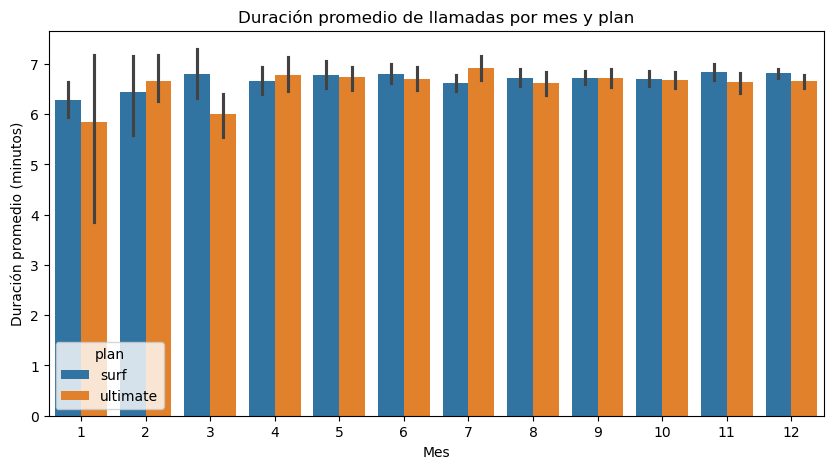

In [35]:
# Duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
llamadas_promedio = llamadas.groupby(['user_id', 'month'])['duration'].mean().reset_index(name='avg_duration')
llamadas_promedio = llamadas_promedio.merge(usuarios[['user_id', 'plan']], on='user_id', how='left')

# Gráfica de duración promedio de llamadas por plan y mes
plt.figure(figsize=(10, 5))
sns.barplot(data=llamadas_promedio, x='month', y='avg_duration', hue='plan')
plt.title('Duración promedio de llamadas por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.show()


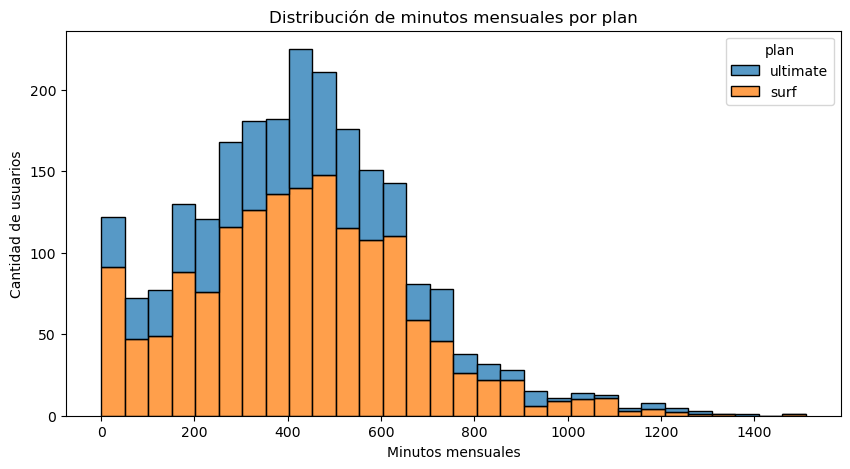

In [36]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(10, 5))
sns.histplot(data=usuarios_mes, x='minutos', hue='plan', multiple='stack', bins=30)
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Cantidad de usuarios')
plt.show()

In [37]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_duracion = usuarios_mes.groupby('plan')['minutos'].mean().reset_index(name='media_duracion')
varianza_duracion = usuarios_mes.groupby('plan')['minutos'].var().reset_index(name='varianza_duracion')
# Imprime los resultados
print("Media de duración mensual de llamadas por plan:")
print(media_duracion)
print("\nVarianza de duración mensual de llamadas por plan:")
print(varianza_duracion)


Media de duración mensual de llamadas por plan:
       plan  media_duracion
0      surf      428.749523
1  ultimate      430.450000

Varianza de duración mensual de llamadas por plan:
       plan  varianza_duracion
0      surf       54968.279461
1  ultimate       57844.464812


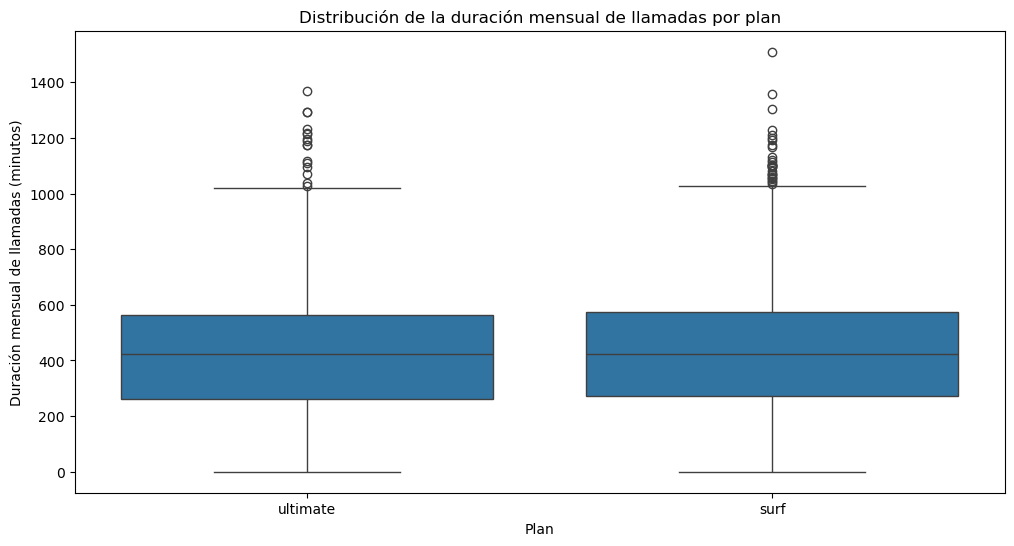

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=usuarios_mes, x='plan', y='minutos')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.show()


**Conclusión**   

Los usuarios de ambos planes consumen casi los mismos minutos al mes, pero los de Ultimate tienden a hacer llamadas más largas, mientras que los de Surf las distribuyen en llamadas más cortas y frecuentes. La gran variabilidad en ambos grupos sugiere que hay distintos perfiles de usuarios, independientemente del plan.

### Mensajes

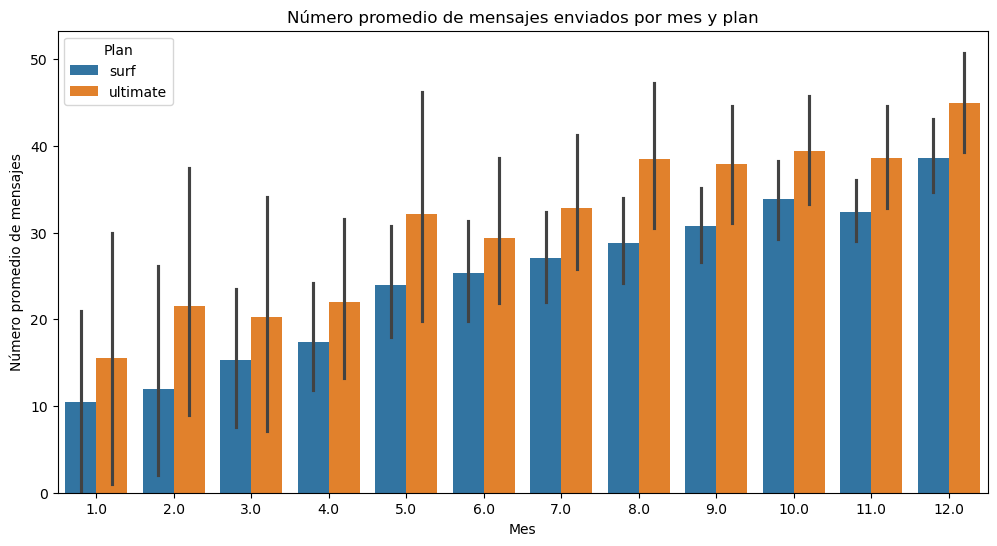

In [39]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(12, 6))
sns.barplot(data=usuarios_mes, x='month', y='mensajes', hue='plan', estimator=np.mean)
plt.title('Número promedio de mensajes enviados por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.legend(title='Plan')
plt.show()

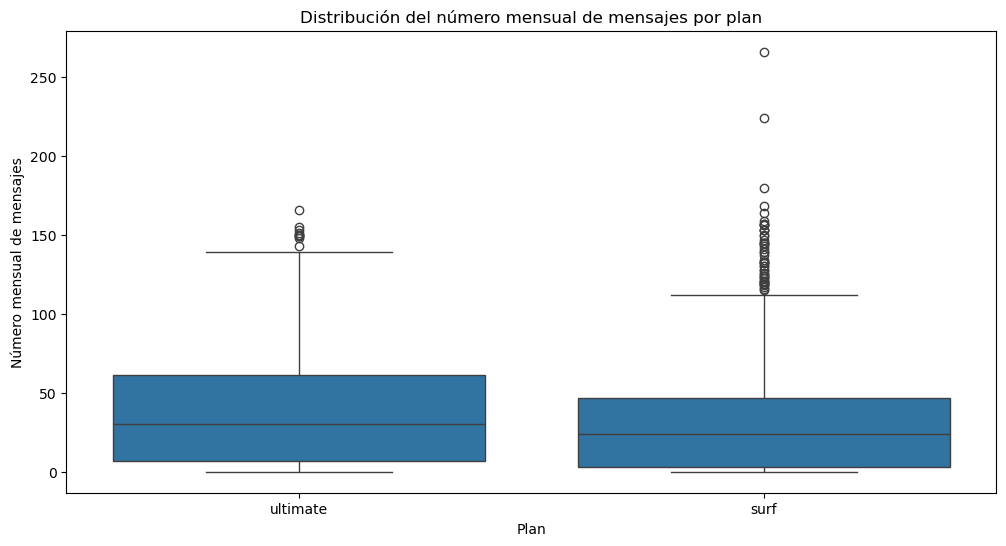

Media de mensajes mensuales por plan:
       plan  media_mensajes
0      surf       31.159568
1  ultimate       37.551389

Varianza de mensajes mensuales por plan:
       plan  varianza_mensajes
0      surf        1126.724522
1  ultimate        1208.756744


In [40]:
# Diagrama de caja para visualizar la distribución de la duración mensual de los mensajes
plt.figure(figsize=(12, 6))
sns.boxplot(data=usuarios_mes, x='plan', y='mensajes')
plt.title('Distribución del número mensual de mensajes por plan')
plt.xlabel('Plan')
plt.ylabel('Número mensual de mensajes')
plt.show()

# Media y varianza de la duración mensual de mensajes.
media_mensajes = usuarios_mes.groupby('plan')['mensajes'].mean().reset_index(name='media_mensajes')
varianza_mensajes = usuarios_mes.groupby('plan')['mensajes'].var().reset_index(name='varianza_mensajes')
# Imprime los resultados
print("Media de mensajes mensuales por plan:")
print(media_mensajes)
print("\nVarianza de mensajes mensuales por plan:")
print(varianza_mensajes)





**Conclusión**   

Los usuarios del plan ultimate tienden a enviar más mensajes mensuales en promedio y muestran un uso más constante a lo largo del año, mientras que los del plan surf presentan mayor variabilidad y casos extremos. Ambos planes muestran una tendencia creciente en el envío de mensajes con el tiempo, lo que indica un uso cada vez más intensivo del servicio. Esto sugiere que el plan ultimate es más atractivo para usuarios activos, mientras que el plan surf podría beneficiarse de ajustes que retengan a sus usuarios más comprometidos.

### Internet

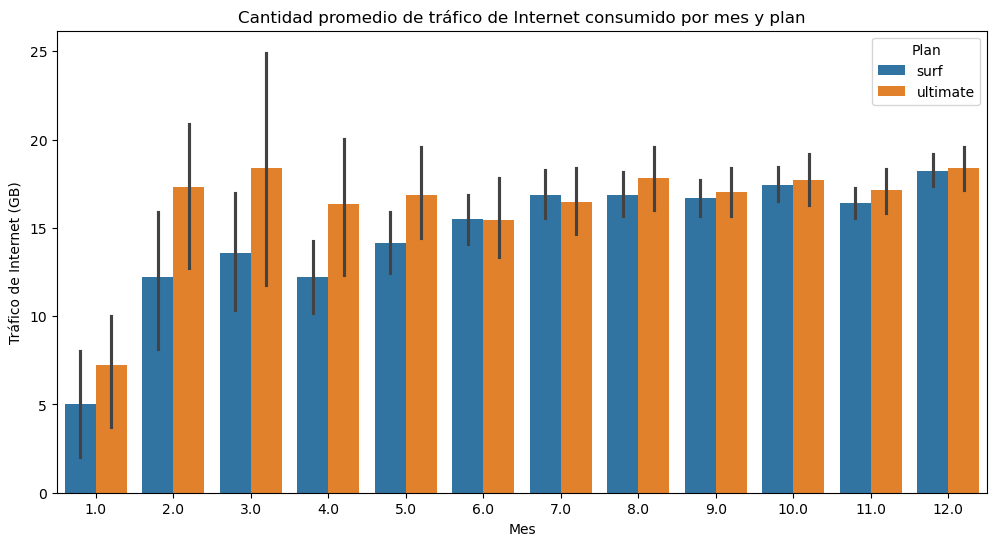

In [41]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(12, 6))
sns.barplot(data=usuarios_mes, x='month', y='gb_used', hue='plan', estimator=np.mean)
plt.title('Cantidad promedio de tráfico de Internet consumido por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (GB)')
plt.legend(title='Plan')
plt.show()


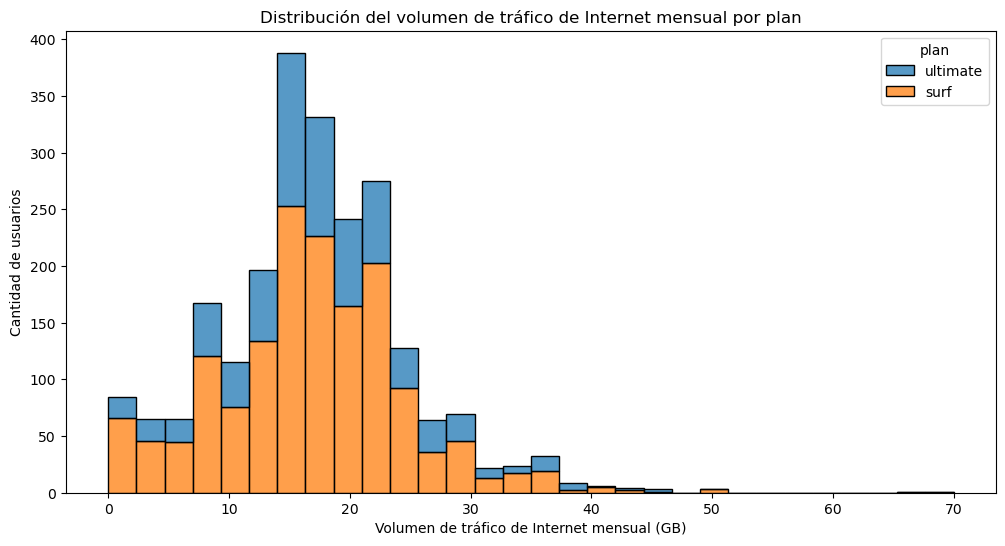

In [42]:
# Compara el volumen de tráfico de Internet mensual que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(12, 6))
sns.histplot(data=usuarios_mes, x='gb_used', hue='plan', multiple='stack', bins=30)
plt.title('Distribución del volumen de tráfico de Internet mensual por plan')
plt.xlabel('Volumen de tráfico de Internet mensual (GB)')
plt.ylabel('Cantidad de usuarios')
plt.show()

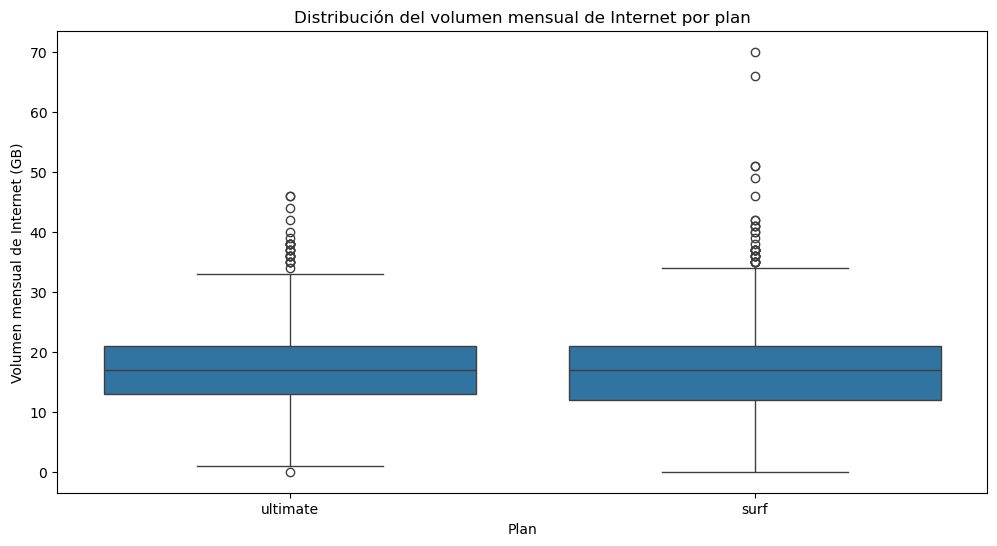

Media de duración mensual de Internet por plan:
       plan  media_internet
0      surf       16.670693
1  ultimate       17.306944

Varianza de duración mensual de Internet por plan:
       plan  varianza_internet
0      surf           61.58360
1  ultimate           58.83055


In [43]:
# Diagrama de caja de la distribución de la duración mensual de Internet
plt.figure(figsize=(12, 6))
sns.boxplot(data=usuarios_mes, x='plan', y='gb_used')
plt.title('Distribución del volumen mensual de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('Volumen mensual de Internet (GB)')
plt.show()

# Media y varianza de la duración mensual de internet.
media_internet = usuarios_mes.groupby('plan')['gb_used'].mean().reset_index(name='media_internet')
varianza_internet = usuarios_mes.groupby('plan')['gb_used'].var().reset_index(name='varianza_internet')
# Imprime los resultados
print("Media de duración mensual de Internet por plan:")
print(media_internet)
print("\nVarianza de duración mensual de Internet por plan:")
print(varianza_internet)



**Conclusión**   

Ambos planes tienen un uso promedio de Internet mensual similar, pero los usuarios del plan surf muestran mayor variabilidad y más casos de alto consumo. Esto sugiere que algunos usuarios de surf podrían beneficiarse al cambiar al plan ultimate, que es más adecuado para un uso intensivo y estable.

## Ingreso

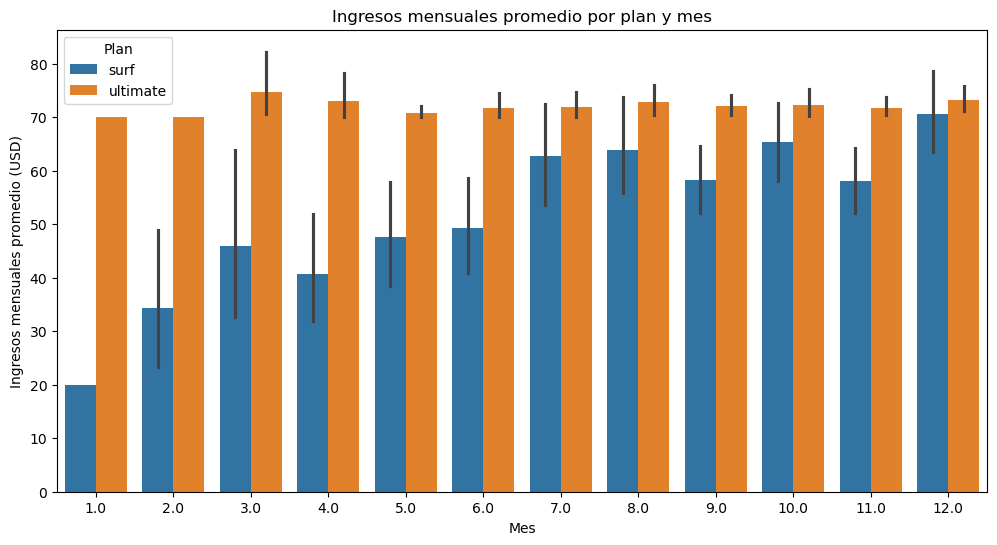

In [44]:
# Compara los ingresos mensuales de los usuarios de cada plan
plt.figure(figsize=(12, 6))
sns.barplot(data=usuarios_mes, x='month', y='monthly_income', hue='plan', estimator=np.mean)
plt.title('Ingresos mensuales promedio por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos mensuales promedio (USD)')
plt.legend(title='Plan')
plt.show()


           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00
Media de ingresos mensuales por plan:
 plan
surf        60.706408
ultimate    72.313889
Name: monthly_income, dtype: float64

Desviación estándar de ingresos mensuales por plan:
 plan
surf        55.388042
ultimate    11.395108
Name: monthly_income, dtype: float64


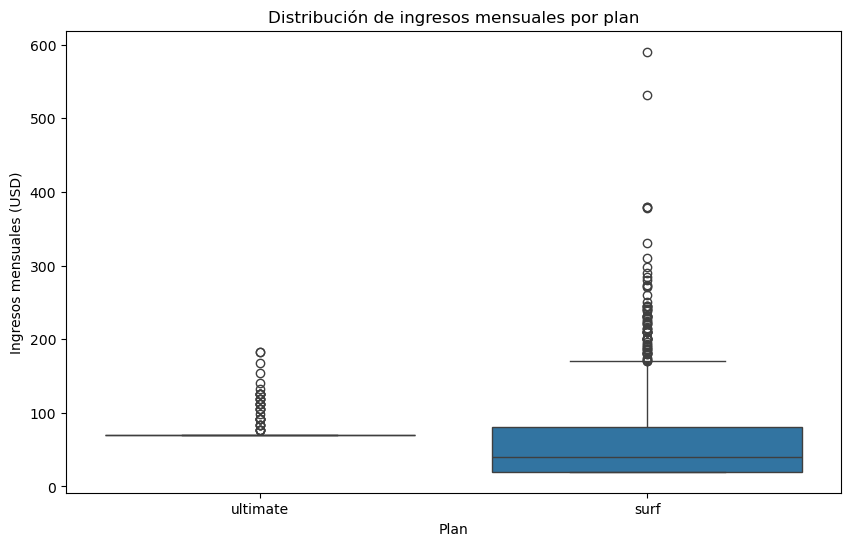

In [45]:
# Ingresos mensuales por plan
estadisticas_ingresos = usuarios_mes.groupby('plan')['monthly_income'].describe()
print(estadisticas_ingresos)

# Media y desviación estándar de los ingresos por plan
media_ingresos = usuarios_mes.groupby('plan')['monthly_income'].mean()
desviacion_ingresos = usuarios_mes.groupby('plan')['monthly_income'].std()
print("Media de ingresos mensuales por plan:\n", media_ingresos)
print("\nDesviación estándar de ingresos mensuales por plan:\n", desviacion_ingresos)

# Diagrama de caja para comparar la distribución de ingresos por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=usuarios_mes, x='plan', y='monthly_income')
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales (USD)')
plt.show()

**Conclusión**   

Se observa que el plan "ultimate" tiene ingresos mensuales más estables y concentrados, mientras que el plan "surf" muestra una mayor variabilidad y presencia de valores atípicos, lo que indica que algunos usuarios de "surf" generan ingresos significativamente más altos debido a excedentes. Esto sugiere que, aunque "ultimate" tiene un ingreso mensual más predecible, "surf" puede generar ingresos elevados en ciertos casos.

## Prueba las hipótesis estadísticas

**Prueba de hipótesis** "Probamos si son diferentes los ingresos promedio procedentes de los usuarios Ultimate y Surf".

Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los planes Ultimate y Surf.
T-statistic: 7.952094891333888, P-value: 3.1703905481135738e-15


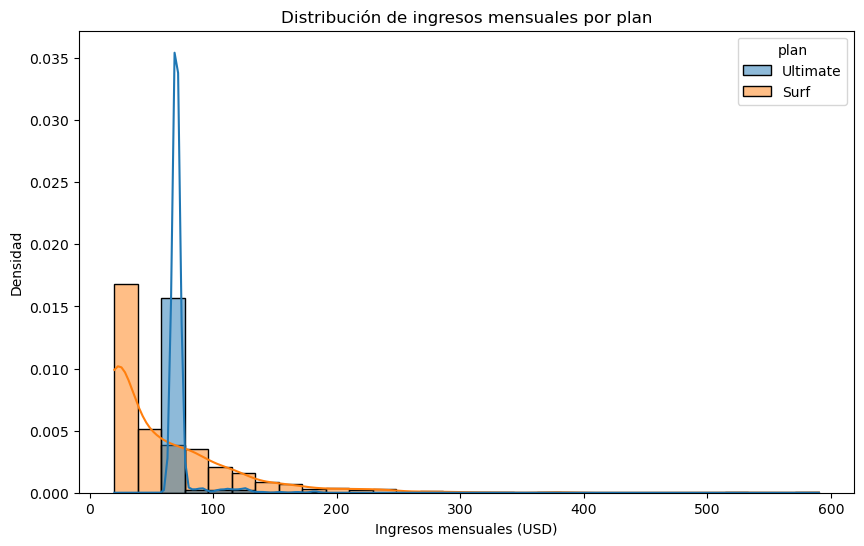

In [46]:
# Prueba las hipótesis
ultimate_income = usuarios_mes[usuarios_mes['plan'] == 'ultimate']['monthly_income'].dropna()
surf_income = usuarios_mes[usuarios_mes['plan'] == 'surf']['monthly_income'].dropna()

# Realizar la prueba t de Student 
resultado = stats.ttest_ind(ultimate_income, surf_income, equal_var=False)
t_stat, p_value = resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los planes Ultimate y Surf.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en los ingresos promedio entre los planes Ultimate y Surf.")


# Imprimir los resultados de la prueba
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Crear un DataFrame combinado para graficar ambos planes juntos
df_hist = pd.concat([
    pd.DataFrame({'monthly_income': ultimate_income, 'plan': 'Ultimate'}),
    pd.DataFrame({'monthly_income': surf_income, 'plan': 'Surf'})
])

plt.figure(figsize=(10, 6))
sns.histplot(data=df_hist, x='monthly_income', hue='plan', kde=True, stat='density', bins=30)
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingresos mensuales (USD)')
plt.ylabel('Densidad')
plt.show()


**Prueba de hipótesis**
"Probamos si el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones".]

Levene's test statistic: 2.345281651730069, P-value: 0.12580091109612837
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.
T-statistic: -2.1309454999502133, P-value: 0.0335256158853001


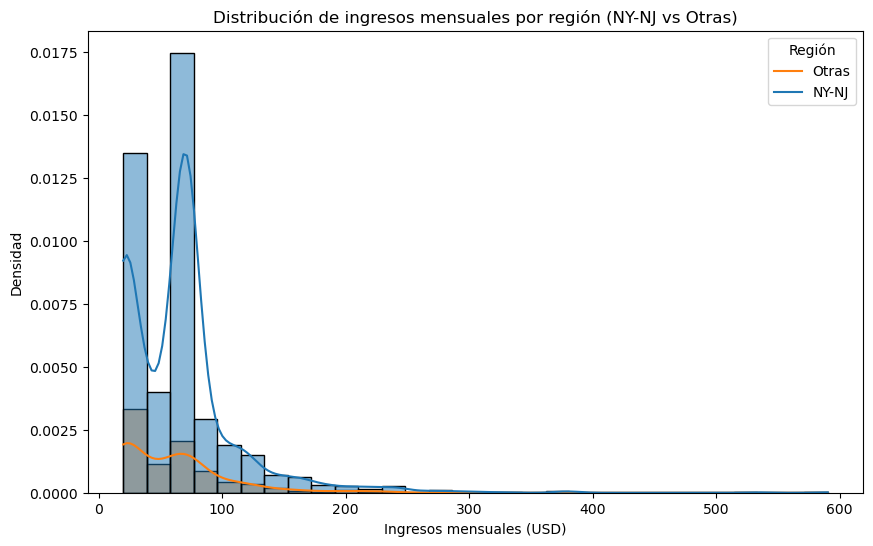

In [47]:
# Prueba las hipótesis
usuarios_mes['is_ny_nj'] = usuarios_mes['city'].str.contains('NY-NJ', case=False, na=False)

# Separar los ingresos según la región
ny_nj_income = usuarios_mes[usuarios_mes['is_ny_nj']]['monthly_income'].dropna()
otras_income = usuarios_mes[~usuarios_mes['is_ny_nj']]['monthly_income'].dropna()

#prueba lavene 
levene_stat, levene_p = stats.levene(ny_nj_income, otras_income)
print(f"Levene's test statistic: {levene_stat}, P-value: {levene_p}")   

# Realiza la prueba t de Student 
t_stat, p_value = stats.ttest_ind(ny_nj_income, otras_income, equal_var=False)

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.")

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# histograma para visualizar la distribución de ingresos mensuales por región
plt.figure(figsize=(10, 6))
sns.histplot(data=usuarios_mes, x='monthly_income', hue='is_ny_nj', kde=True, stat='density', bins=30)
plt.title('Distribución de ingresos mensuales por región (NY-NJ vs Otras)')
plt.xlabel('Ingresos mensuales (USD)')
plt.ylabel('Densidad')
plt.legend(title='Región', labels=['Otras', 'NY-NJ'])
plt.show()


## Conclusión general

Este análisis comparó el comportamiento de los usuarios de los planes Ultimate y Surf de la empresa Megaline, con base en datos de llamadas, mensajes, uso de internet e ingresos mensuales.

**Principales hallazgos**:

***Comportamiento de Uso Minutos, mensajes y Datos:***

Ambos planes (Ultimate y Surf) muestran un consumo promedio similar en llamadas,mensajes y uso de internet, con una ligera ventaja para Ultimate.

Alta variabilidad: Existen usuarios con patrones de uso muy distintos (desde bajos hasta altos consumos), lo que sugiere que los planes atraen perfiles diversos.
Variabilidad:

Las varianzas tanto en minutos como en uso de internet son altas en ambos planes, lo que indica una amplia diversidad de uso entre los clientes.

***Ingresos mensuales:***

Se comprobó estadísticamente que hay una diferencia significativa en los ingresos promedio entre los usuarios de los dos planes.

Los usuarios del plan Ultimate generan más ingresos mensuales para la empresa.


***Conclusión:***


El plan Ultimate, aunque más caro, resulta más rentable para Megaline debido a sus ingresos promedio significativamente mayores. Esto sugiere que incentivar a los usuarios a cambiarse al plan Ultimate podría ser una estrategia comercial beneficiosa para la empresa.